In [1]:
import pandas as pd
import numpy as np
import ast
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Load the Dataset

In [3]:
chennai_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/chennai_cars%20-%20chennai_cars.csv.csv")
banglore_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/bangalore_cars%20-%20bangalore_cars.csv.csv")
hyderabad_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/hyderabad_cars%20-%20hyderabad_cars.csv.csv")
delhi_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/delhi_cars%20-%20delhi_cars.csv.csv")
kolkata_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/kolkata_cars%20-%20kolkata_cars.csv.csv")
jaipur_cars = pd.read_csv("https://raw.githubusercontent.com/MohammedAsikHussain/Data-Set/refs/heads/main/jaipur_cars%20-%20jaipur_cars.csv.csv")

In [4]:
chennai_cars["new_car_detail"]

0       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1       {'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...
2       {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
3       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
4       {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
                              ...                        
1414    {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...
1415    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1416    {'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...
1417    {'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...
1418    {'it': 0, 'ft': 'Diesel', 'bt': 'Sedan', 'km':...
Name: new_car_detail, Length: 1419, dtype: object

In [5]:
#Extract new_car_details from all Citys....

def car_details(df,column_name):
    car_detail=[]
    for i in df[column_name]:
        car_detail.append(ast.literal_eval(i)) #To convert a string represented dictionary to an original dictionary

    new_car_details = pd.DataFrame(car_detail)
    return new_car_details

car_details_chennai = car_details(chennai_cars,"new_car_detail")
car_details_banglore = car_details(banglore_cars,"new_car_detail")
car_details_hyderabad = car_details(hyderabad_cars,"new_car_detail")
car_details_delhi = car_details(delhi_cars,"new_car_detail")
car_details_kolkata = car_details(kolkata_cars,"new_car_detail")
car_details_jaipur = car_details(jaipur_cars,"new_car_detail")

In [6]:
car_details_kolkata.head(5)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText
0,0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,₹ 9.75 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
1,0,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,T Option,₹ 2.66 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
2,0,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,RXT AMT,₹ 5.95 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
3,0,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,₹ 2.23 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
4,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,₹ 12 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...


In [7]:
car_details_chennai["City"] = 'Chennai'
car_details_banglore["City"] = 'Banglore'
car_details_hyderabad["City"] = 'Hyderabad'
car_details_delhi["City"] = 'Delhi'
car_details_kolkata["City"] = 'Kolkata'
car_details_jaipur["City"] = 'Jaipur'

In [8]:
car_details_jaipur.head(2)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,City
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Jaipur
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Jaipur


In [9]:
chennai_cars["new_car_overview"]

0       {'heading': 'Car overview', 'top': [{'key': 'R...
1       {'heading': 'Car overview', 'top': [{'key': 'R...
2       {'heading': 'Car overview', 'top': [{'key': 'R...
3       {'heading': 'Car overview', 'top': [{'key': 'R...
4       {'heading': 'Car overview', 'top': [{'key': 'R...
                              ...                        
1414    {'heading': 'Car overview', 'top': [{'key': 'R...
1415    {'heading': 'Car overview', 'top': [{'key': 'R...
1416    {'heading': 'Car overview', 'top': [{'key': 'R...
1417    {'heading': 'Car overview', 'top': [{'key': 'R...
1418    {'heading': 'Car overview', 'top': [{'key': 'R...
Name: new_car_overview, Length: 1419, dtype: object

In [10]:
#Extract new_car_overview from all Citys...

def car_overview(df,column_name):
    car_overview=[]
    for i in df[column_name]:
        car_data = ast.literal_eval(i)["top"] #To convert a string represented dictionary to an original dictionary
        car_overview.append({item["key"]: item["value"] for item in car_data})  # dictionary comprehension to iterate each row

    new_car_overview = pd.DataFrame(car_overview)

    return new_car_overview


car_overview_chennai = car_overview(chennai_cars,"new_car_overview")
car_overview_banglore = car_overview(banglore_cars,"new_car_overview")
car_overview_hyderabad = car_overview(hyderabad_cars,"new_car_overview")
car_overview_delhi = car_overview(delhi_cars,"new_car_overview")
car_overview_kolkata = car_overview(kolkata_cars,"new_car_overview")
car_overview_jaipur = car_overview(jaipur_cars,"new_car_overview")

In [11]:
car_overview_kolkata

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2014,Third Party insurance,Petrol,5 Seats,"70,000 Kms",WB02,Third Owner,2494 cc,Automatic,2014.0
1,Jul 2017,Comprehensive,Petrol,5 Seats,"23,981 Kms",WB24,First Owner,799 cc,Manual,2017.0
2,Nov 2021,Comprehensive,Petrol,5 Seats,"7,100 Kms",WB06,First Owner,999 cc,Automatic,2021.0
3,Feb 2012,Third Party,Petrol,5 Seats,"71,574 Kms",WB06,Second Owner,1197 cc,Manual,2011.0
4,2014,Third Party insurance,Diesel,5 Seats,"50,000 Kms",WB02,Second Owner,1968 cc,Automatic,2014.0
...,...,...,...,...,...,...,...,...,...,...
1376,2022,Third Party insurance,Petrol,5 Seats,"10,000 Kms",NaN,First Owner,998 cc,Manual,2022.0
1377,2014,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",NaN,First Owner,796 cc,Manual,2014.0
1378,2011,Third Party insurance,Petrol,5 Seats,"50,000 Kms",WB06,Third Owner,1796 cc,Automatic,2011.0
1379,2012,Third Party insurance,Petrol,5 Seats,"40,000 Kms",NaN,First Owner,1197 cc,Manual,2012.0


In [12]:
#Extract new_car_specifications from all Citys...

def car_specs(df, column_name):
    car_specs = []

    for item in df[column_name]:
        car_data = ast.literal_eval(item) if isinstance(item, str) else item
        top_specs = {entry["key"]: entry["value"] for entry in car_data["top"]}

        # Extract all specifications from each section in 'data'
        all_specs = {}
        for section in car_data["data"]:
            for spec in section["list"]:
                # Each 'spec' here is already a dictionary with 'key' and 'value'
                all_specs[spec["key"]] = spec["value"]

        # Combine top_specs and detailed_specs
        combined_specs = {**top_specs, **all_specs}
        car_specs.append(combined_specs)

    new_car_specs = pd.DataFrame(car_specs)

    return new_car_specs

car_specs_chennai = car_specs(chennai_cars,"new_car_specs")
car_specs_banglore = car_specs(banglore_cars,"new_car_specs")
car_specs_hyderabad = car_specs(hyderabad_cars,"new_car_specs")
car_specs_delhi = car_specs(delhi_cars,"new_car_specs")
car_specs_kolkata = car_specs(kolkata_cars,"new_car_specs")
car_specs_jaipur = car_specs(jaipur_cars,"new_car_specs")

In [13]:
car_specs_chennai

,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,998 CC,118.36bhp@6000rpm,172nm,16,5,Black,Smartstream G1.0 T - GDi,998,172nm@1500-4000rpm,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1196 CC,73bhp@6000rpm,101Nm,NaN,7,Grey,In-Line Engine,1196,101Nm@3000rpm,4.0,...,9.9:1,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN
2,999 CC,98.63bhp@5000rpm,160Nm,16,5,Others,HRA0 1.0 TURBO PETROL,999,160Nm@2800-3600rpm,3.0,...,NaN,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN
3,1086 CC,68.05bhp@5500rpm,99.04Nm,NaN,5,Silver,IRDE2 Engine,1086,99.04Nm@4500rpm,4.0,...,NaN,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN
4,1199 CC,88.7bhp@6000rpm,110Nm,15,5,Others,i-VTEC Petrol Engine,1199,110Nm@4800rpm,4.0,...,NaN,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1197 CC,81.80bhp@6000rpm,113Nm,NaN,5,Blue,VTVT Engine,1197,113Nm@4200rpm,4.0,...,NaN,No,1530mm,1530mm,1315kg,4.8 Meters,NaN,NaN,NaN,NaN
1415,1461 CC,83.8bhp@3750rpm,200Nm,16,5,Orange,dCi THP Diesel Engine,1461,200Nm@1750rpm,4.0,...,NaN,No,1560mm,1567mm,1777kg,5.2 metres,156 Kmph,13.9 Seconds,NaN,NaN
1416,1198 CC,108.5bhp@5000rpm,170Nm,16,5,White,Revotron 1.2L Turbocharged engine,1198,170Nm@1750-4000rpm,3.0,...,NaN,No,1540 mm,1530 mm,NaN,5.1m,154.19 kmph,NaN,77x85.8,209 mm
1417,1968 CC,141bhp@4000rpm,340Nm,18,5,Grey,Common Rail Direct Injection,1968,340Nm@1750-2750rpm,4.0,...,NaN,No,1578mm,1568mm,2250kg,5.75meters,NaN,NaN,74.5 x 81 mm,NaN


In [14]:
car_specs_chennai.columns

Index(['Engine', 'Max Power', 'Torque', 'Wheel Size', 'Seats', 'Color',
       'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Fuel Suppy System', 'Turbo Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Seating Capacity', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'Alloy Wheel Size', 'No Door Numbers',
       'Cargo Volumn', 'Mileage', 'Value Configuration', 'Compression Ratio',
       'Super Charger', 'Front Tread', 'Rear Tread', 'Gross Weight',
       'Turning Radius', 'Top Speed', 'Acceleration', 'BoreX Stroke',
       'Ground Clearance Unladen'],
      dtype='object')

In [15]:
#Concatenate all datasets from cardetails

Car_Details = pd.concat([car_details_chennai,car_details_banglore,
                         car_details_hyderabad,car_details_delhi,
                         car_details_kolkata,car_details_jaipur], ignore_index = True)

In [16]:
Car_Details.head(4)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,City
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Chennai
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Chennai
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Chennai
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Chennai


In [17]:
#Concatenate all datasets from caroverview

Car_Overviews = pd.concat([car_overview_chennai,car_overview_banglore,
                         car_overview_hyderabad,car_overview_delhi,
                         car_overview_kolkata,car_overview_jaipur], ignore_index = True)

In [18]:
Car_Overviews.head(4)

,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,2022,Third Party insurance,Petrol,5 Seats,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022.0
1,Feb 2015,Comprehensive,Petrol,7 Seats,"20,687 Kms",TN04,First Owner,1196 cc,Manual,2015.0
2,2021,Third Party insurance,Petrol,5 Seats,"30,000 Kms",TN22,First Owner,999 cc,Manual,2021.0
3,May 2015,Comprehensive,Petrol,5 Seats,"59,247 Kms",TN11,First Owner,1086 cc,Manual,2015.0


In [19]:
#Concatenate all datasets from carSpecifications

Car_Specifications = pd.concat([car_specs_chennai,car_specs_banglore,
                         car_specs_hyderabad,car_specs_delhi,
                         car_specs_kolkata,car_specs_jaipur], ignore_index = True)

In [20]:
Car_Specifications.head(4)

,Engine,Max Power,Torque,Wheel Size,Seats,Color,Engine Type,Displacement,Max Torque,No of Cylinder,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,998 CC,118.36bhp@6000rpm,172nm,16,5,Black,Smartstream G1.0 T - GDi,998,172nm@1500-4000rpm,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1196 CC,73bhp@6000rpm,101Nm,NaN,7,Grey,In-Line Engine,1196,101Nm@3000rpm,4.0,...,9.9:1,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN
2,999 CC,98.63bhp@5000rpm,160Nm,16,5,Others,HRA0 1.0 TURBO PETROL,999,160Nm@2800-3600rpm,3.0,...,NaN,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN
3,1086 CC,68.05bhp@5500rpm,99.04Nm,NaN,5,Silver,IRDE2 Engine,1086,99.04Nm@4500rpm,4.0,...,NaN,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN


In [21]:
# #Concatenate all datasets to finaldataset

df = pd.concat([Car_Details,Car_Overviews,Car_Specifications], axis=1)
df

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Compression Ratio,Super Charger,Front Tread,Rear Tread,Gross Weight,Turning Radius,Top Speed,Acceleration,BoreX Stroke,Ground Clearance Unladen
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,9.9:1,No,1280mm,1290mm,1540kg,4.5 metres,145 Kmph,15.7 Seconds,NaN,NaN
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,NaN,No,NaN,NaN,NaN,5.0,NaN,11.7,72.2 x 81.3,NaN
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,NaN,No,1400mm,1385mm,NaN,4.7 metres,165 Kmph,14.3 Seconds,NaN,NaN
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,NaN,No,NaN,NaN,NaN,5.1 meters,172 Kmph,13.7 Seconds,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Chevrolet,Chevrolet Beat,2011,...,NaN,No,NaN,NaN,NaN,4.85metres,NaN,NaN,NaN,NaN
8365,0,Petrol,Hatchback,"70,000",Manual,1,1st Owner,Maruti,Maruti Alto,2007,...,NaN,No,1295mm,1290mm,1140kg,4.6m,137km/hr,17.7 seconds,68.5 x 72.0 mm,NaN
8366,0,Petrol,SUV,"20,000",Manual,1,1st Owner,Renault,Renault Kiger,2022,...,NaN,NaN,1536,1535,NaN,NaN,NaN,NaN,NaN,NaN
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Alto,2009,...,NaN,No,1295mm,1290mm,1140kg,4.6m,137km/hr,17.7 seconds,68.5 x 72.0 mm,NaN


In [22]:
df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText', 'City',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Engine', 'Max Power', 'Torque', 'Wheel Size',
       'Seats', 'Color', 'Engine Type', 'Displacement', 'Max Torque',
       'No of Cylinder', 'Values per Cylinder', 'Fuel Suppy System',
       'Turbo Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Kerb Weight', 'Gear Box', 'Drive Type', 'Seating Capacity',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'Alloy Wheel Size', 'No Door Numbers', 'Cargo Volumn', 'Mileage',
       'Value Configuration', 'Compression Ratio', 'Super Charger',
       'Front Tread', 'Rear Tread', 'Gross Weight', 'T

In [23]:
df.drop(['it', 'owner',
       'modelYear', 'centralVariantId', 'variantName',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Torque', 'Wheel Size',
       'Seats', 'Color', 'Engine Type', 'Displacement', 'Max Torque',
       'No of Cylinder', 'Values per Cylinder', 'Fuel Suppy System',
       'Turbo Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Kerb Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
       'Alloy Wheel Size', 'No Door Numbers', 'Cargo Volumn',
       'Value Configuration', 'Compression Ratio', 'Super Charger',
       'Front Tread', 'Rear Tread', 'Gross Weight', 'Turning Radius',
       'Top Speed', 'Acceleration', 'BoreX Stroke',
       'Ground Clearance Unladen'], axis=1, inplace= True)

In [24]:
df.shape

(8369, 14)

# Data Cleaning

In [26]:
df.isnull().sum()

ft                     0
bt                     0
km                     0
transmission           0
ownerNo                0
oem                    0
model                  0
price                  0
City                   0
Registration Year     52
Engine                 4
Max Power             60
Seating Capacity       6
Mileage              287
dtype: int64

In [27]:
#df.fillna("N/A" ,inplace=True)

In [28]:
#Replace columnn names
df=df.rename(columns={"ft":"Fuel_Type","bt":"Body_type","oem":"Brand","Registration Year":"Registration_Year","Max Power":"Max_Power","Seating Capacity":"Seats"})
df

,Fuel_Type,Body_type,km,transmission,ownerNo,Brand,model,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,Petrol,SUV,"20,000",Automatic,1,Kia,Kia Sonet,₹ 11.50 Lakh,Chennai,2022,998 CC,118.36bhp@6000rpm,5,NaN
1,Petrol,Minivans,"20,687",Manual,1,Maruti,Maruti Eeco,₹ 4.15 Lakh,Chennai,Feb 2015,1196 CC,73bhp@6000rpm,7,15.37 kmpl
2,Petrol,SUV,"30,000",Manual,1,Nissan,Nissan Magnite,₹ 7.50 Lakh,Chennai,2021,999 CC,98.63bhp@5000rpm,5,20 kmpl
3,Petrol,Hatchback,"59,247",Manual,1,Hyundai,Hyundai i10,₹ 3.98 Lakh,Chennai,May 2015,1086 CC,68.05bhp@5500rpm,5,19.81 kmpl
4,Petrol,Hatchback,"50,000",Manual,1,Honda,Honda Jazz,₹ 5.50 Lakh,Chennai,2015,1199 CC,88.7bhp@6000rpm,5,18.7 kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,"1,20,000",Manual,1,Chevrolet,Chevrolet Beat,₹ 1.08 Lakh,Jaipur,2011,1199 CC,79.4bhp@6200rpm,5,18.6 kmpl
8365,Petrol,Hatchback,"70,000",Manual,1,Maruti,Maruti Alto,₹ 1.05 Lakh,Jaipur,2007,796 CC,46.3bhp@6200rpm,5,19.7 kmpl
8366,Petrol,SUV,"20,000",Manual,1,Renault,Renault Kiger,₹ 8.50 Lakh,Jaipur,2022,999 CC,71.01bhp@6250rpm,5,19.17 kmpl
8367,Petrol,Hatchback,"40,000",Manual,1,Maruti,Maruti Alto,₹ 1 Lakh,Jaipur,2009,796 CC,46.3bhp@6200rpm,5,19.7 kmpl


In [29]:
#Standardising Data Formats:

In [30]:
#convert datatypes
df["km"]=df["km"].replace(",", "",regex=True).astype(int)


In [31]:
df.dtypes

Fuel_Type            object
Body_type            object
km                    int32
transmission         object
ownerNo               int64
Brand                object
model                object
price                object
City                 object
Registration_Year    object
Engine               object
Max_Power            object
Seats                object
Mileage              object
dtype: object

In [32]:
df["Seats"] = pd.to_numeric(df["Seats"], errors='coerce')
df["Seats"]=  df["Seats"].fillna(df["Seats"].mean())
df["Seats"] = df["Seats"].astype(int)

In [33]:
df["Engine"] = pd.to_numeric(df["Engine"].replace("CC", "", regex=True), errors='coerce')
df["Engine"] = df["Engine"].fillna(df["Engine"].mean())
df["Engine"]=df["Engine"].astype(int)

In [34]:
df["Mileage"] = pd.to_numeric(df["Mileage"].replace("kmpl", "", regex=True), errors='coerce')
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].mean())
df["Mileage"]= df["Mileage"].astype(int)

In [35]:
df['Max_Power'] = df['Max_Power'].str.split('bhp').str[0]
df['Max_Power'] = pd.to_numeric(df['Max_Power'], errors='coerce')
df['Max_Power'] = df['Max_Power'].fillna(df['Max_Power'].mean()).astype(int)

In [36]:
df["price"]=df["price"].replace("₹", "",regex=True)
df["price"]=df["price"].replace(",", "",regex=True)

In [37]:
def convert_to_lakh(price):
    if pd.isna(price):  # Check for NaN or None values
        return None
    price = str(price)
    if 'Crore' in price:
        return str(float(price.replace(" Crore", "")) * 100)
    elif 'Lakh' in price:
        return str(float(price.replace(" Lakh", "")))
    else:
        return str(float(price) / 100000)

In [38]:
df["price"] = df["price"].apply(convert_to_lakh)

In [39]:
df["price"] = df["price"].astype(float)
print(df["price"])

0       11.50
1        4.15
2        7.50
3        3.98
4        5.50
        ...  
8364     1.08
8365     1.05
8366     8.50
8367     1.00
8368     5.00
Name: price, Length: 8369, dtype: float64


In [40]:
df['Registration_Year'] = pd.to_numeric(df['Registration_Year'], errors='coerce')
df['Registration_Year'] = df['Registration_Year'].fillna(df['Registration_Year'].median())
df['Registration_Year'] = df['Registration_Year'].astype(int)

In [41]:
df.dtypes

Fuel_Type             object
Body_type             object
km                     int32
transmission          object
ownerNo                int64
Brand                 object
model                 object
price                float64
City                  object
Registration_Year      int32
Engine                 int32
Max_Power              int32
Seats                  int32
Mileage                int32
dtype: object

In [42]:
cardata = df.copy()
cardata.to_csv("cardata.csv", index=False)
cardata

,Fuel_Type,Body_type,km,transmission,ownerNo,Brand,model,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,Petrol,SUV,20000,Automatic,1,Kia,Kia Sonet,11.50,Chennai,2022,998,118,5,19
1,Petrol,Minivans,20687,Manual,1,Maruti,Maruti Eeco,4.15,Chennai,2016,1196,73,7,15
2,Petrol,SUV,30000,Manual,1,Nissan,Nissan Magnite,7.50,Chennai,2021,999,98,5,20
3,Petrol,Hatchback,59247,Manual,1,Hyundai,Hyundai i10,3.98,Chennai,2016,1086,68,5,19
4,Petrol,Hatchback,50000,Manual,1,Honda,Honda Jazz,5.50,Chennai,2015,1199,88,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,120000,Manual,1,Chevrolet,Chevrolet Beat,1.08,Jaipur,2011,1199,79,5,18
8365,Petrol,Hatchback,70000,Manual,1,Maruti,Maruti Alto,1.05,Jaipur,2007,796,46,5,19
8366,Petrol,SUV,20000,Manual,1,Renault,Renault Kiger,8.50,Jaipur,2022,999,71,5,19
8367,Petrol,Hatchback,40000,Manual,1,Maruti,Maruti Alto,1.00,Jaipur,2009,796,46,5,19


# Data Visualization 

<Axes: title={'center': 'Count of Fuel type'}, xlabel='Fuel_Type', ylabel='count'>

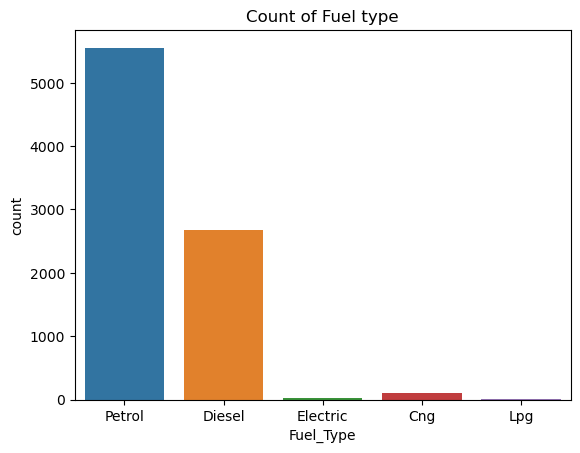

In [44]:
# visual the count of fuel type
plt.title("Count of Fuel type")
sns.countplot(x=df["Fuel_Type"],data=df,hue="Fuel_Type")

<Axes: title={'center': 'Count of Transmission'}, xlabel='transmission', ylabel='count'>

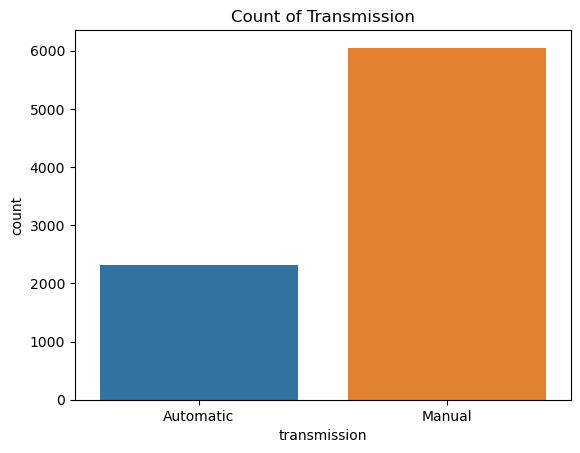

In [45]:
# visual the count of fuel type
plt.title("Count of Transmission")
sns.countplot(x=df["transmission"],data=df,hue="transmission")

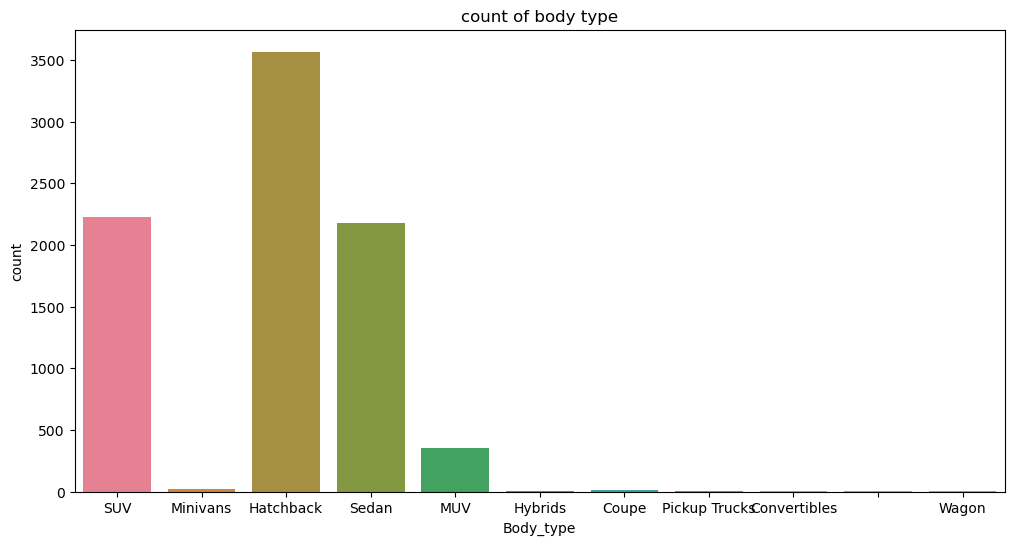

In [46]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["Body_type"],data=df,hue="Body_type")
plt.show()

# Exploratory Data Analysis (EDA)

<Axes: xlabel='transmission', ylabel='price'>

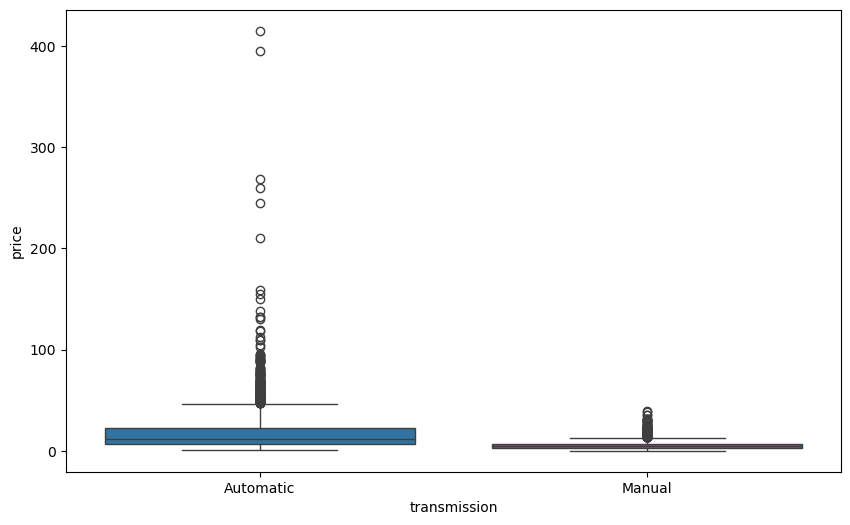

In [48]:
# Transmission and price
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=df)

<Axes: xlabel='Body_type', ylabel='price'>

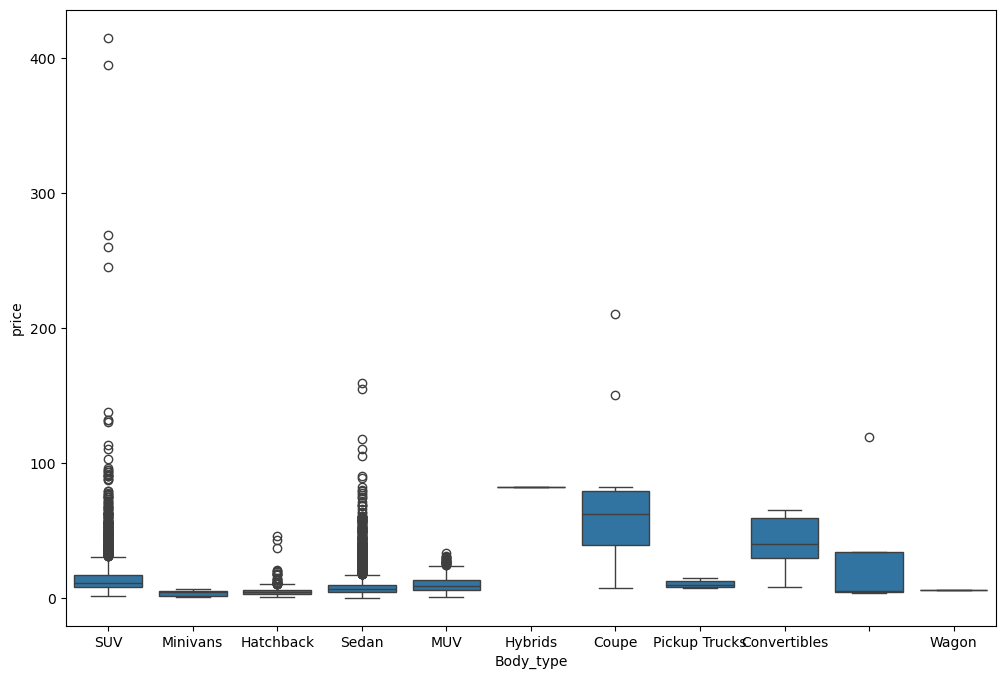

In [49]:
# Body type	and price
plt.figure(figsize=(12,8))
sns.boxplot(x='Body_type', y='price', data=df)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5420\869536658.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Body_type', y='Mileage', data=df, palette='pastel')


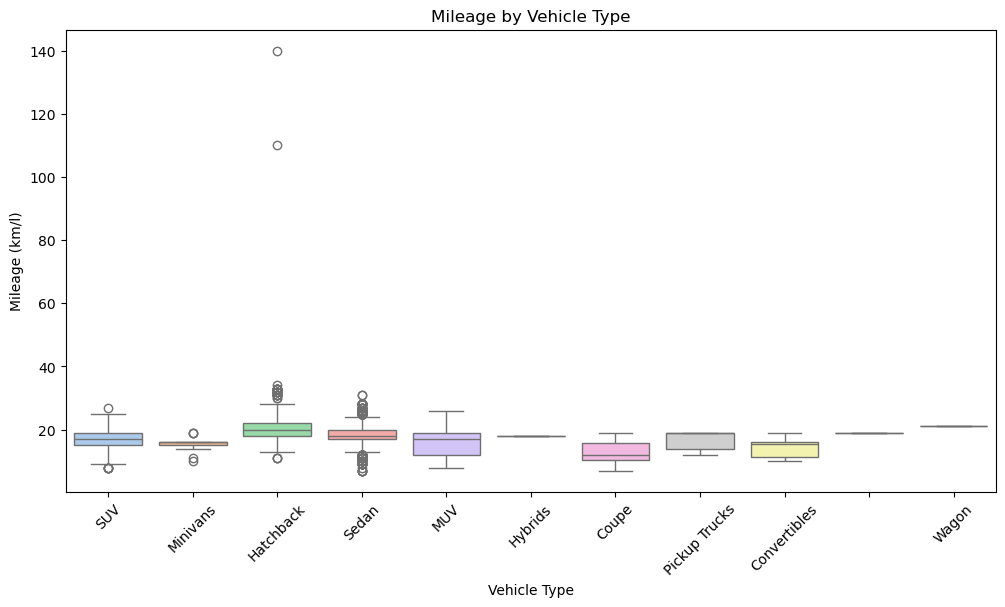

In [50]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body_type', y='Mileage', data=df, palette='pastel')
plt.title('Mileage by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Mileage (km/l)')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

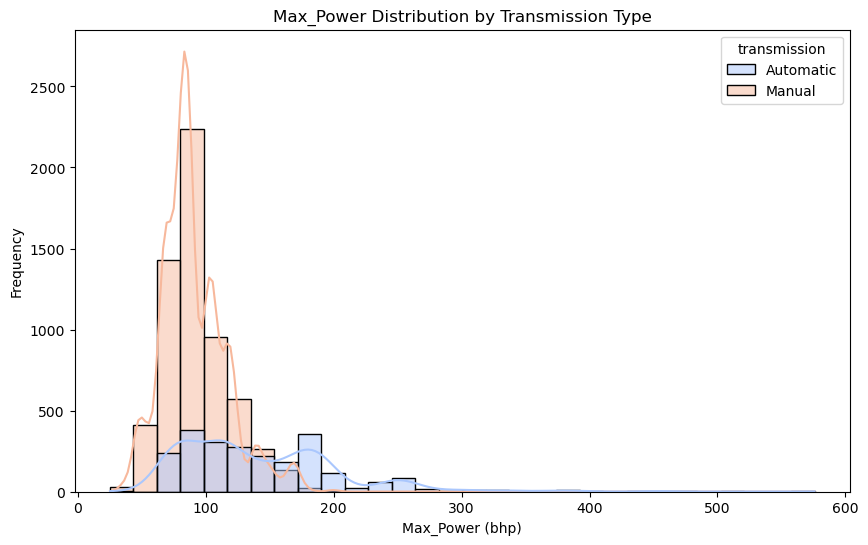

In [51]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Max_Power', hue='transmission', bins=30, kde=True, palette='coolwarm')
plt.title('Max_Power Distribution by Transmission Type')
plt.xlabel('Max_Power (bhp)')
plt.ylabel('Frequency')
plt.show()

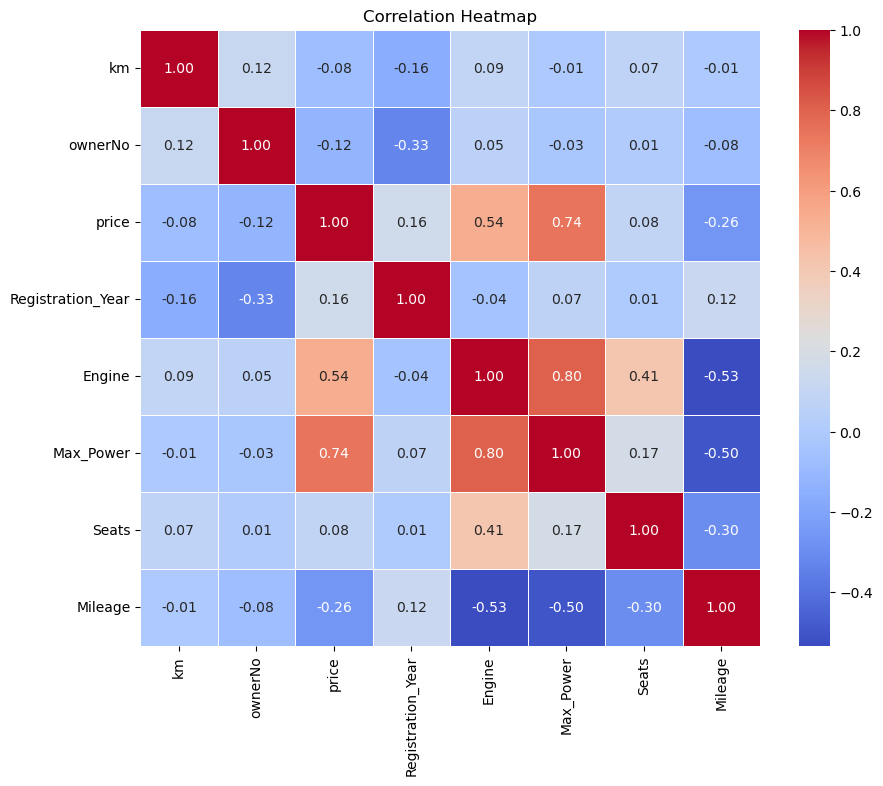

In [52]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [53]:
#Encoding Categorical value into  numerical:

In [54]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'Electric', 'Cng', 'Lpg'], dtype=object)

In [55]:
le = preprocessing.LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])
df["Fuel_Type"].unique()

array([4, 1, 2, 0, 3])

In [56]:
df.dtypes

Fuel_Type              int32
Body_type             object
km                     int32
transmission          object
ownerNo                int64
Brand                 object
model                 object
price                float64
City                  object
Registration_Year      int32
Engine                 int32
Max_Power              int32
Seats                  int32
Mileage                int32
dtype: object

In [57]:
df["transmission"].unique()

array(['Automatic', 'Manual'], dtype=object)

In [58]:
le = preprocessing.LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])
df["transmission"].unique()

array([0, 1])

In [59]:
df["City"].unique()

array(['Chennai', 'Banglore', 'Hyderabad', 'Delhi', 'Kolkata', 'Jaipur'],
      dtype=object)

In [60]:
le = preprocessing.LabelEncoder()
df["City"] = le.fit_transform(df["City"])
df["City"].unique()

array([1, 0, 3, 2, 5, 4])

In [61]:
df["Brand"].unique()

array(['Kia', 'Maruti', 'Nissan', 'Hyundai', 'Honda', 'Mercedes-Benz',
       'BMW', 'Ford', 'Tata', 'Jeep', 'Toyota', 'Audi', 'Mahindra',
       'Renault', 'Chevrolet', 'Volkswagen', 'Datsun', 'Fiat',
       'Land Rover', 'MG', 'Skoda', 'Isuzu', 'Mini', 'Volvo', 'Jaguar',
       'Citroen', 'Mitsubishi', 'Mahindra Renault', 'Mahindra Ssangyong',
       'Lexus', 'Opel', 'Hindustan Motors', 'Porsche'], dtype=object)

In [62]:
le = preprocessing.LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])
df["Brand"].unique()

array([13, 20, 24,  9,  8, 21,  1,  6, 29, 12, 30,  0, 17, 27,  2, 31,  4,
        5, 14, 16, 28, 10, 22, 32, 11,  3, 23, 18, 19, 15, 25,  7, 26])

In [63]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [64]:
numeric_features

['Fuel_Type',
 'km',
 'transmission',
 'ownerNo',
 'Brand',
 'price',
 'City',
 'Registration_Year',
 'Engine',
 'Max_Power',
 'Seats',
 'Mileage']

In [65]:
categorical_features

['Body_type', 'model']

In [66]:
df

,Fuel_Type,Body_type,km,transmission,ownerNo,Brand,model,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,4,SUV,20000,0,1,13,Kia Sonet,11.50,1,2022,998,118,5,19
1,4,Minivans,20687,1,1,20,Maruti Eeco,4.15,1,2016,1196,73,7,15
2,4,SUV,30000,1,1,24,Nissan Magnite,7.50,1,2021,999,98,5,20
3,4,Hatchback,59247,1,1,9,Hyundai i10,3.98,1,2016,1086,68,5,19
4,4,Hatchback,50000,1,1,8,Honda Jazz,5.50,1,2015,1199,88,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,Hatchback,120000,1,1,2,Chevrolet Beat,1.08,4,2011,1199,79,5,18
8365,4,Hatchback,70000,1,1,20,Maruti Alto,1.05,4,2007,796,46,5,19
8366,4,SUV,20000,1,1,27,Renault Kiger,8.50,4,2022,999,71,5,19
8367,4,Hatchback,40000,1,1,20,Maruti Alto,1.00,4,2009,796,46,5,19


In [67]:
# Normalizing Numerical Features:
df_scaled = df.copy()
col_names = ['km','ownerNo','Registration_Year','price','Engine','Max_Power','Seats','Mileage']
features = df_scaled[col_names]
scaler = MinMaxScaler()
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled

,Fuel_Type,Body_type,km,transmission,ownerNo,Brand,model,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,4,SUV,0.003636,0,0.2,13,Kia Sonet,0.027238,1,0.952381,0.1996,0.168784,0.375,0.090226
1,4,Minivans,0.003761,1,0.2,20,Maruti Eeco,0.009519,1,0.666667,0.2392,0.087114,0.625,0.060150
2,4,SUV,0.005455,1,0.2,24,Nissan Magnite,0.017595,1,0.904762,0.1998,0.132486,0.375,0.097744
3,4,Hatchback,0.010772,1,0.2,9,Hyundai i10,0.009109,1,0.666667,0.2172,0.078040,0.375,0.090226
4,4,Hatchback,0.009091,1,0.2,8,Honda Jazz,0.012773,1,0.619048,0.2398,0.114338,0.375,0.082707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,Hatchback,0.021818,1,0.2,2,Chevrolet Beat,0.002118,4,0.428571,0.2398,0.098004,0.375,0.082707
8365,4,Hatchback,0.012727,1,0.2,20,Maruti Alto,0.002045,4,0.238095,0.1592,0.038113,0.375,0.090226
8366,4,SUV,0.003636,1,0.2,27,Renault Kiger,0.020006,4,0.952381,0.1998,0.083485,0.375,0.090226
8367,4,Hatchback,0.007273,1,0.2,20,Maruti Alto,0.001925,4,0.333333,0.1592,0.038113,0.375,0.090226


In [68]:
df.describe()

,Fuel_Type,km,transmission,ownerNo,Brand,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
count,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,2.986378,5.897430e+04,0.723145,1.360139,16.191182,9.569037,2.416418,2015.840124,1424.735572,104.787788,5.203131,18.807743
std,1.431784,7.406100e+04,0.447471,0.641958,8.520320,14.162026,1.703520,2.594534,477.514975,45.381811,0.663573,3.916975
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.201610,0.000000,2002.000000,0.000000,25.000000,2.000000,7.000000
25%,1.000000,3.000000e+04,0.000000,1.000000,9.000000,3.990000,1.000000,2016.000000,1197.000000,78.000000,5.000000,17.000000
50%,4.000000,5.369200e+04,1.000000,1.000000,17.000000,6.010000,2.000000,2016.000000,1248.000000,88.000000,5.000000,19.000000
75%,4.000000,8.000000e+04,1.000000,2.000000,20.000000,9.500000,4.000000,2016.000000,1498.000000,118.000000,5.000000,21.000000
max,4.000000,5.500000e+06,1.000000,5.000000,32.000000,415.000000,5.000000,2023.000000,5000.000000,576.000000,10.000000,140.000000


In [69]:
# Removing Outliers:

<Axes: ylabel='Mileage'>

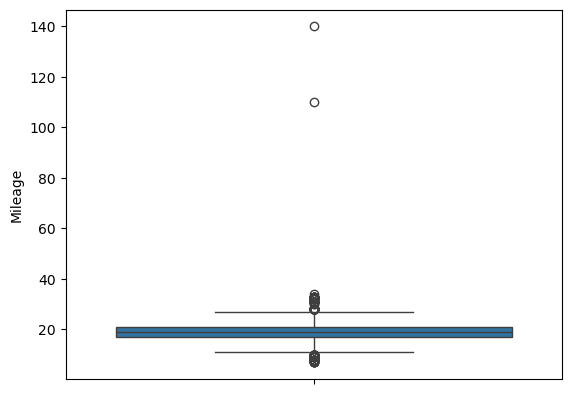

In [70]:
sns.boxplot(df['Mileage'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_5420\1381581615.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

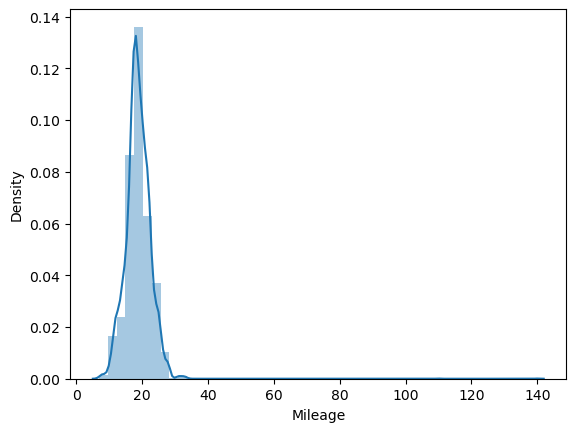

In [71]:
sns.distplot(df['Mileage'])

In [72]:
#Using IQR (Interquartile Range) method
Q1 = df['Mileage'].quantile(0.25)
Q3 = df['Mileage'].quantile(0.75)
IQR = Q3 - Q1

In [73]:
Q1 , Q3 , IQR

(17.0, 21.0, 4.0)

In [74]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(11.0, 27.0)

In [75]:
# find outlayers
df.loc[(df['Mileage']>= upper_limit) | (df['Mileage']<= lower_limit)]

,Fuel_Type,Body_type,km,transmission,ownerNo,Brand,model,price,City,Registration_Year,Engine,Max_Power,Seats,Mileage
33,4,MUV,13000,0,1,30,Toyota Innova Crysta,27.90,1,2016,2694,163,7,8
37,1,Hatchback,80000,1,1,8,Honda Jazz,5.75,1,2017,1498,98,5,27
48,1,Sedan,110505,0,1,20,Maruti Swift Dzire,6.27,1,2016,1248,74,5,28
54,1,Sedan,80000,1,1,20,Maruti Ciaz,8.50,1,2017,1248,88,5,28
55,1,Sedan,80000,1,1,20,Maruti Ciaz,8.50,1,2017,1248,88,5,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,1,Sedan,60000,1,1,20,Maruti Ciaz,7.00,4,2018,1248,88,5,28
8276,1,Sedan,120000,1,1,20,Maruti Swift Dzire,6.30,4,2018,1248,74,5,28
8286,1,Sedan,90000,1,4,20,Maruti Swift Dzire,6.70,4,2018,1248,74,5,28
8287,1,SUV,150000,0,1,32,Volvo XC60,40.00,4,2019,1969,235,5,11


In [76]:
# Capping - change the outlayer value to uppoerlimit to lower limit
df['Mileage'] = df['Mileage'].astype(float)
df.loc[(df['Mileage']>= upper_limit), 'Mileage'] = upper_limit
df.loc[(df['Mileage']<= lower_limit), 'Mileage'] = lower_limit

<Axes: ylabel='Mileage'>

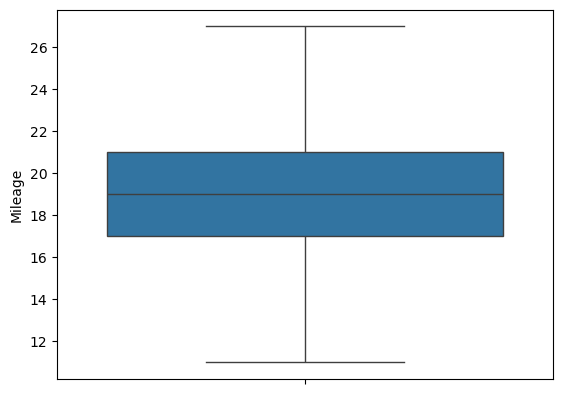

In [77]:
sns.boxplot(df['Mileage'])

In [78]:
# Mean
mean = df.mean(numeric_only=True)
print(mean)

Fuel_Type                2.986378
km                   58974.302426
transmission             0.723145
ownerNo                  1.360139
Brand                   16.191182
price                    9.569037
City                     2.416418
Registration_Year     2015.840124
Engine                1424.735572
Max_Power              104.787788
Seats                    5.203131
Mileage                 18.775839
dtype: float64


In [79]:
# Median
median = df.mean(numeric_only=True)
print(median)

Fuel_Type                2.986378
km                   58974.302426
transmission             0.723145
ownerNo                  1.360139
Brand                   16.191182
price                    9.569037
City                     2.416418
Registration_Year     2015.840124
Engine                1424.735572
Max_Power              104.787788
Seats                    5.203131
Mileage                 18.775839
dtype: float64


In [80]:
# Mode
mode = df.mode(numeric_only=True).iloc[0]
print(mode)

Fuel_Type                 4.0
km                   120000.0
transmission              1.0
ownerNo                   1.0
Brand                    20.0
price                     6.5
City                      2.0
Registration_Year      2016.0
Engine                 1197.0
Max_Power                88.0
Seats                     5.0
Mileage                  18.0
Name: 0, dtype: float64


In [81]:
# Standard Deviation
std_dev = df.std(numeric_only=True)
print(std_dev)

Fuel_Type                1.431784
km                   74060.999945
transmission             0.447471
ownerNo                  0.641958
Brand                    8.520320
price                   14.162026
City                     1.703520
Registration_Year        2.594534
Engine                 477.514975
Max_Power               45.381811
Seats                    0.663573
Mileage                  3.434505
dtype: float64


In [82]:
# Variance
variance = df.var(numeric_only=True)
print(variance)

Fuel_Type            2.050006e+00
km                   5.485032e+09
transmission         2.002303e-01
ownerNo              4.121107e-01
Brand                7.259585e+01
price                2.005630e+02
City                 2.901982e+00
Registration_Year    6.731607e+00
Engine               2.280206e+05
Max_Power            2.059509e+03
Seats                4.403296e-01
Mileage              1.179583e+01
dtype: float64


In [83]:
cardeatils = df.copy()
cardeatils.to_csv("cardeatils.csv", index=False)

# ML model

In [85]:
# split features and target
X = df.drop(['Body_type','model','price'],axis = 1)
Y = df['price']

In [86]:
# Train-Test Split:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [87]:
# train the model

models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state=42),
    'Random Forest' :  RandomForestRegressor(n_estimators=100,random_state=42),
    'Gradient Boosting' : GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3,random_state=42),
    'Lasso' : Lasso(alpha=0.1, max_iter=2000),
    'Ridge' : Ridge()
}

result = {}
for name, model in models.items():
    model.fit(X_train, Y_train) # Train the model
    
    Y_pred = model.predict(X_test)  # Predict on the test set
    
    mae = metrics.mean_absolute_error(Y_test, Y_pred) # Calculate evaluation metrics
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    
    result[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [88]:
model_results_df = pd.DataFrame(result).T
print(model_results_df)

                        MAE        MSE      RMSE        R2
Linear Regression  4.236386  76.734656  8.759832  0.561875
Decision Tree      2.265524  53.846964  7.338049  0.692555
Random Forest      1.853294  45.466656  6.742897  0.740403
Gradient Boosting  2.157979  46.413486  6.812744  0.734997
Lasso              4.211143  78.012427  8.832464  0.554579
Ridge              4.236354  76.736406  8.759932  0.561865


# Hyperparameter tuning for random forest model

In [96]:
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(Y_test, Y_pred)
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    rmse =  np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    
    # Print the metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R² Score:", r2)
    
    return mae, rmse, r2


In [91]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2']  
}

In [92]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [93]:
# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [98]:
# Evaluate the best model on the test set
best_model_performance = evaluate_model(best_model, X_train, Y_train, X_test, Y_test)
print("Best Parameters:", best_params)
print("Best Model Performance:", best_model_performance)

Mean Absolute Error (MAE): 1.8042962146016268
Mean Squared Error (MSE): 34.81089690833212
Root Mean Squared Error (RMSE): 5.900076008691085
R² Score: 0.8012432120987198
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Performance: (1.8042962146016268, 5.900076008691085, 0.8012432120987198)


In [100]:
#final model fit and prediction
final_model=RandomForestRegressor(n_estimators=100,max_features='sqrt',max_depth=30,min_samples_leaf=1,
                                  min_samples_split=2,random_state=42)

final_model.fit(X_train,Y_train)


RandomForestRegressor(max_depth=30, max_features='sqrt', random_state=42)

In [104]:
#Model evaluation
Y_pred_fm=final_model.predict(X_test)
mse_fm=metrics.mean_squared_error(Y_test,Y_pred_fm)
mae_fm=metrics.mean_absolute_error(Y_test,Y_pred_fm)
rmse_fm=np.sqrt(mse_fm)
r2_fm=r2_score(Y_test,Y_pred_fm)

print(f"Trainscore: {final_model.score(X_train, Y_train)}")
print(f"Testscore: {final_model.score(X_test, Y_test)}")

Trainscore: 0.9760542576114852
Testscore: 0.8012432120987198


In [106]:
# create dataframe to view above evaluation metrics
rf_fm = pd.DataFrame({"model":"RandomForestRegressor","MAE":[mae_fm],"MSE":[mse_fm],"RMSE":[rmse_fm],"R2":r2_fm})
rf_fm

,model,MAE,MSE,RMSE,R2
0,RandomForestRegressor,1.804296,34.810897,5.900076,0.801243


# Model Prediction

In [129]:
# New data to predict car price on BMW car
new_df=pd.DataFrame({
    'Fuel_Type':'1', # Diesel =1
    'km':35000.0,
    'transmission':'1', #Automatic:0
    'ownerNo':1,
    'Brand':'1', #BMW :1
    'City':1, #Chennai:1
    'Registration_Year':2018,
    'Engine' : 3000.0,
    'Max_Power':110,
    'Seats':5,
    'Mileage':15    
},index=[0])
new_df

,Fuel_Type,km,transmission,ownerNo,Brand,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,1,35000.0,1,1,1,1,2018,3000.0,110,5,15


In [131]:
# FINAL MODEL PREDICTION 
prediction=final_model.predict(new_df)
print(f"The price of the car is: ₹{round(prediction[0],2)} ")

The price of the car is: ₹31.96 


In [137]:
# New data to predict car price on Maruti car
new_df1=pd.DataFrame({
    'Fuel_Type':'1', # Diesel =1
    'km':35000.0,
    'transmission':'1', #Manual:1
    'ownerNo':1,
    'Brand':'20', #Maruti :20
    'City':1, #Chennai:1
    'Registration_Year':2018,
    'Engine' : 796,
    'Max_Power':46,
    'Seats':5,
    'Mileage':18    
},index=[0])
new_df1

,Fuel_Type,km,transmission,ownerNo,Brand,City,Registration_Year,Engine,Max_Power,Seats,Mileage
0,1,35000.0,1,1,20,1,2018,796,46,5,18


In [139]:
# FINAL MODEL PREDICTION 
prediction=final_model.predict(new_df1)
print(f"The price of the car is: ₹{round(prediction[0],2)} ")

The price of the car is: ₹3.24 


# Save the model

In [142]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved successfully!")

Model saved successfully!
